In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import imread
from skimage.transform import resize
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from glob import glob
%config InlineBackend.figure_format = 'svg'

def load_notmnist(path='./notMNIST_small',letters='ABCDEFGHIJ',
                  img_shape=(28,28),test_size=0.25,one_hot=False):
    
    # download data if it's missing. If you have any problems, go to the urls and load it manually.
    if not os.path.exists(path):
        print("Downloading data...")
        assert os.system('curl http://yaroslavvb.com/upload/notMNIST/notMNIST_small.tar.gz > notMNIST_small.tar.gz') == 0
        print("Extracting ...")
        assert os.system('tar -zxvf notMNIST_small.tar.gz > untar_notmnist.log') == 0
    
    data,labels = [],[]
    print("Parsing...")
    for img_path in glob(os.path.join(path,'*/*')):
        class_i = img_path.split(os.sep)[-2]
        if class_i not in letters: 
            continue
        try:
            data.append(resize(imread(img_path), img_shape))
            labels.append(class_i,)
        except:
            print("found broken img: %s [it's ok if <10 images are broken]" % img_path)
        
    data = np.stack(data)[:,None].astype('float32')
    data = (data - np.mean(data)) / np.std(data)

    #convert classes to ints
    letter_to_i = {l:i for i,l in enumerate(letters)}
    labels = np.array(list(map(letter_to_i.get, labels)))
    
    if one_hot:
        labels = (np.arange(np.max(labels) + 1)[None,:] == labels[:, None]).astype('float32')
    
    #split into train/test
    X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=test_size, stratify=labels)
    
    print("Done")
    return X_train, y_train, X_test, y_test

In [2]:
%%time
X_train, y_train, X_test, y_test = load_notmnist(letters='ABCDEFGHIJ')
X_train, X_test = X_train.reshape([-1, 784]), X_test.reshape([-1, 784])

Parsing...
found broken img: ./notMNIST_small/A/RGVtb2NyYXRpY2FCb2xkT2xkc3R5bGUgQm9sZC50dGY=.png [it's ok if <10 images are broken]
found broken img: ./notMNIST_small/F/Q3Jvc3NvdmVyIEJvbGRPYmxpcXVlLnR0Zg==.png [it's ok if <10 images are broken]
Done
CPU times: user 1.9 s, sys: 390 ms, total: 2.29 s
Wall time: 4.25 s


In [3]:
X_train.shape, X_test.shape

((14043, 784), (4681, 784))

In [4]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([1404, 1405, 1405, 1404, 1405, 1404, 1404, 1404, 1404, 1404]))

In [5]:
def plot_letters(X, y_true, y_pred=None, n=4, random_state=123):
    np.random.seed(random_state)
    indices = np.random.choice(np.arange(X.shape[0]), size=n*n, replace=False)
    plt.figure(figsize=(10, 10))
    for i in range(n*n):
        plt.subplot(n, n, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(X[indices[i]].reshape(28, 28), cmap='gray')
        # plt.imshow(train_images[i], cmap=plt.cm.binary)
        if y_pred is None:
            title = chr(ord("A") + y_true[indices[i]])
        else:
            title = f"y={chr(ord('A') + y_true[indices[i]])}, ŷ={chr(ord('A') + y_pred[indices[i]])}"
        plt.title(title, size=20)
    plt.show()

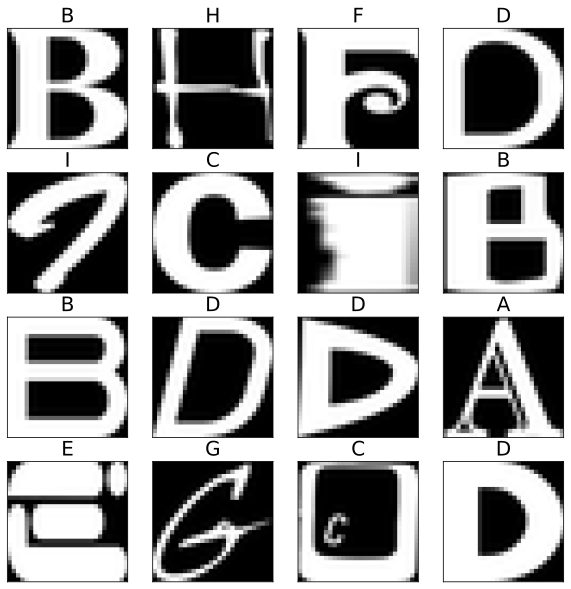

In [6]:
plot_letters(X_train, y_train, random_state=8)

In [7]:
def accuracy_round(y_test, y_pref):
    return np.ceil(accuracy_score(y_test, y_pred) * 100

def display_info(y_test, y_pred):
    print(f"Accuracy: {accuracy_round(y_test, y_pred)}%")
    levels = [x for x in "ABCDEFGHIJ"]
    ax = plt.subplot(1, 1, 1)
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".1f", center = True, ax=ax);

    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('Test labels') 
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(levels)
    ax.yaxis.set_ticklabels(levels)

    plot_letters(X_test, y_test, y_pred)

def metrics_show(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    display_info(y_test, y_pred)

### Imports

In [8]:
%%time

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.neural_network import MLPClassifier


CPU times: user 220 ms, sys: 62.3 ms, total: 282 ms
Wall time: 1.01 s


### Logistic Regression

Accuracy: 88.0%


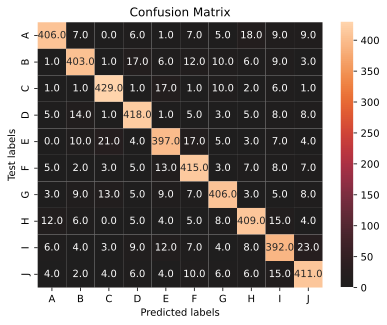

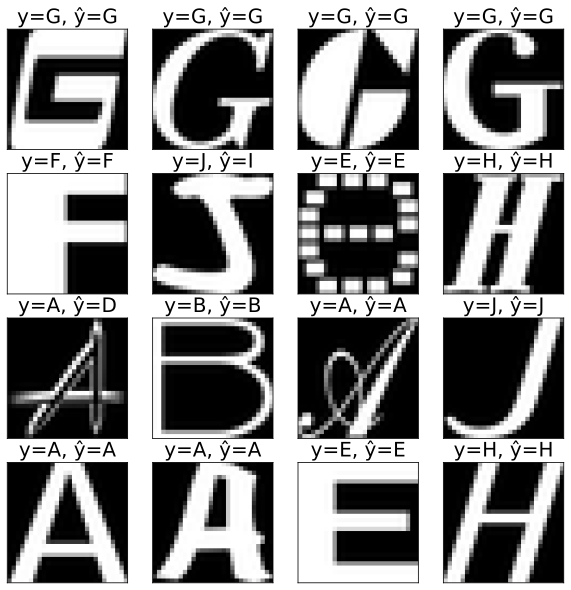

CPU times: user 3min 21s, sys: 2.86 s, total: 3min 24s
Wall time: 30.9 s


In [13]:
%%time

scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X_train)
logistic_regression = LogisticRegression(random_state=8, max_iter=900, multi_class='multinomial')
metrics_show(logistic_regression, scaler.transform(X_train), y_train, scaler.transform(X_test), y_test)

### KNN

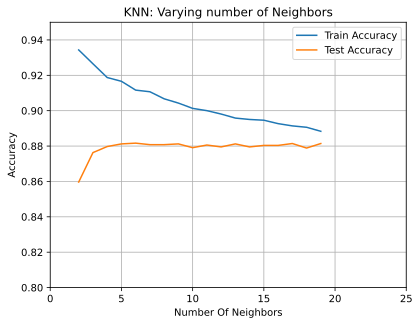

CPU times: user 4min 51s, sys: 6.9 s, total: 4min 58s
Wall time: 44.2 s


In [18]:
%%time

train_score = {}
test_score = {}
n_neighbors = np.arange(2, 20, 1)
for neighbor in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    train_score[neighbor]=knn.score(X_train, y_train)
    test_score[neighbor]=knn.score(X_test, y_test)
plt.plot(n_neighbors, train_score.values(), label="Train Accuracy")
plt.plot(n_neighbors, test_score.values(), label="Test Accuracy")
plt.xlabel("Number Of Neighbors")
plt.ylabel("Accuracy")
plt.title("KNN: Varying number of Neighbors")
plt.legend()
plt.xlim(0, 25)
plt.ylim(0.80, 0.95)
plt.grid()
plt.show()

In [19]:
for key, value in test_score.items():
    if value==max(test_score.values()):
        print(key, value)

6 0.8816492202520829


Accuracy: 88.0%


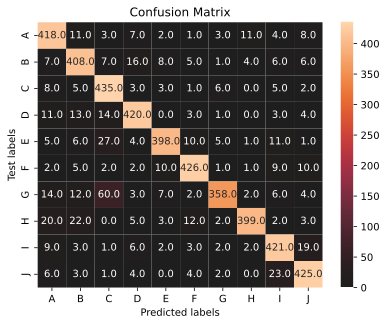

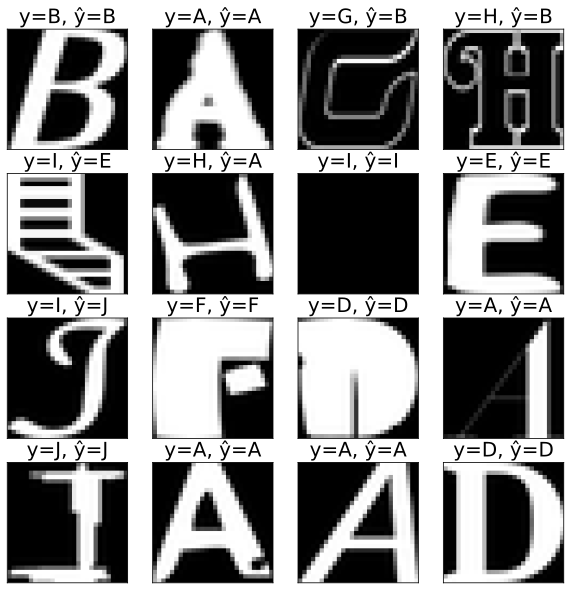

CPU times: user 7.57 s, sys: 1.32 s, total: 8.89 s
Wall time: 1.33 s


In [9]:
%%time

knn = KNeighborsClassifier(n_neighbors=6)

metrics_show(knn, X_train, y_train, X_test, y_test)

### Naive Bayes

In [10]:
%%time

param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
nbModel_grid.fit(X_train, y_train)
print(nbModel_grid.best_estimator_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
GaussianNB(var_smoothing=0.006579332246575682)
CPU times: user 1.57 s, sys: 411 ms, total: 1.98 s
Wall time: 23.3 s


Accuracy: 81.0%


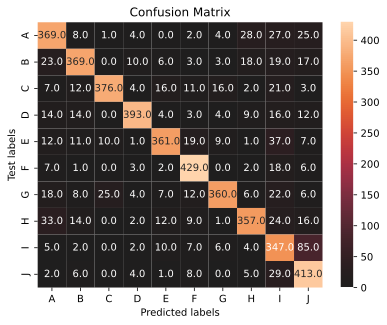

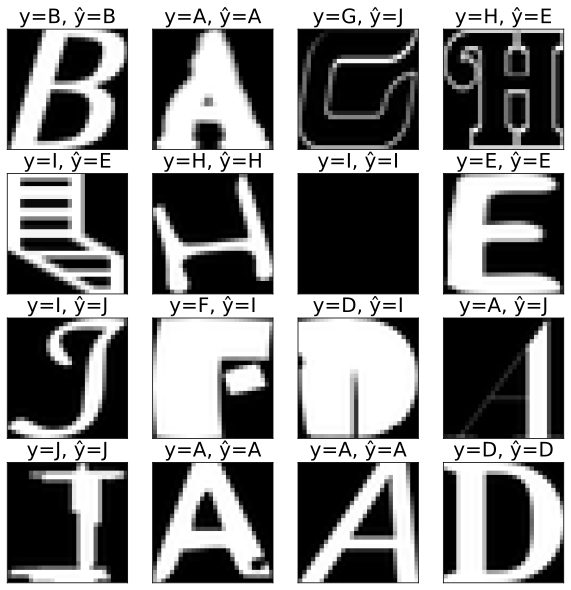

CPU times: user 2.08 s, sys: 847 ms, total: 2.93 s
Wall time: 670 ms


In [11]:
%%time

naivebayes = GaussianNB(**nbModel_grid.best_params_)

metrics_show(naivebayes, X_train, y_train, X_test, y_test)

### Decision Tree

In [12]:
%%time

param_grid_nb = {
    'criterion': ['gini','entropy', 'log_loss'],
    'splitter': ['best', 'random']
}

nbModel_grid = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
nbModel_grid.fit(X_train, y_train)
print(nbModel_grid.best_params_)

Fitting 10 folds for each of 6 candidates, totalling 60 fits
{'criterion': 'entropy', 'splitter': 'random'}
CPU times: user 837 ms, sys: 47.5 ms, total: 884 ms
Wall time: 21.4 s


Accuracy: 83.0%


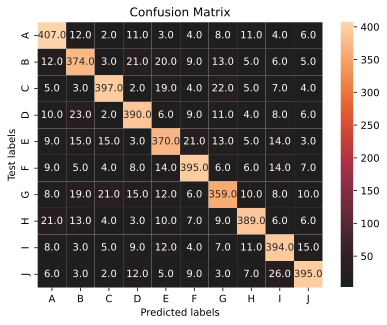

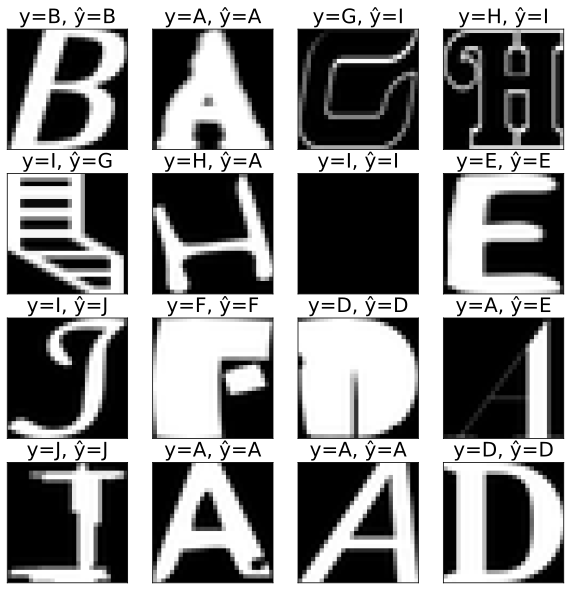

CPU times: user 1.82 s, sys: 14.1 ms, total: 1.83 s
Wall time: 1.08 s


In [13]:
%%time

decision_tree = DecisionTreeClassifier(**nbModel_grid.best_params_)

metrics_show(decision_tree, X_train, y_train, X_test, y_test)

### Random Forest

Accuracy: 92.0%


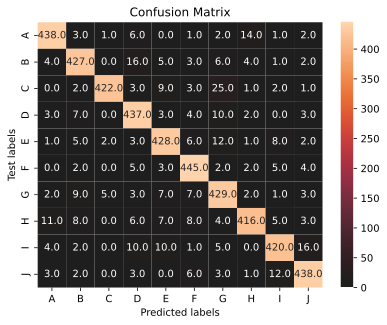

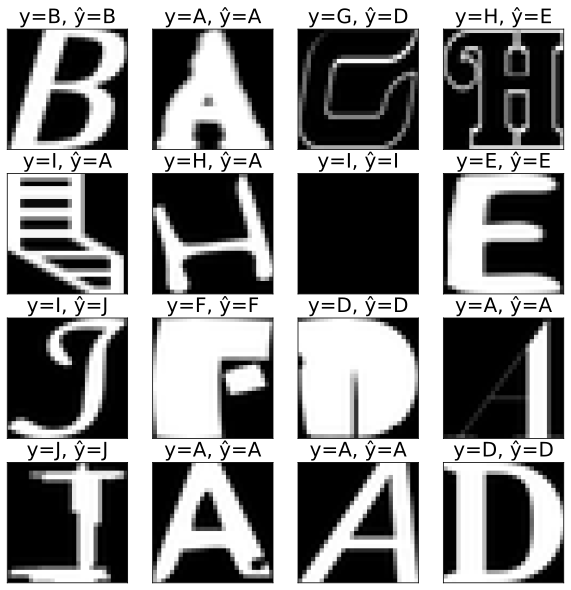

CPU times: user 1min 14s, sys: 808 ms, total: 1min 15s
Wall time: 1min 14s


In [19]:
%%time

randomforest = RandomForestClassifier(random_state=8, n_estimators=1000, max_features='sqrt', criterion='gini')

metrics_show(randomforest, X_train, y_train, X_test, y_test)

### MLP

Accuracy: 92.0%


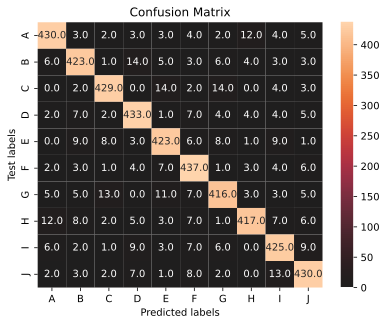

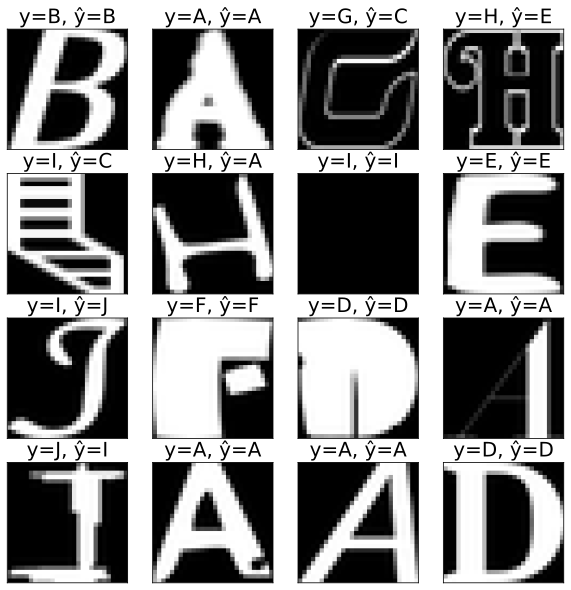

In [27]:
mlp = MLPClassifier(random_state=8, max_iter=1000, solver='sgd')

metrics_show(mlp, X_train, y_train, X_test, y_test)

### CNN

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, BatchNormalization, Dropout
from tensorflow.keras.metrics import categorical_accuracy

def CNN_model(loss = 'categorical_crossentropy', 
              optimizer = 'adam', 
              metrics = ['accuracy']):
    
    model = Sequential([
        Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
        BatchNormalization(),
        MaxPool2D(),
    
        Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
        BatchNormalization(),
        MaxPool2D(),
    
        Flatten(),
    
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dropout(0.25),
        Dense(10, activation='softmax'),
    ])
    
    
    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=metrics,
    )
    # model.summary()
    
    return model

/Users/dimmyt/PycharmProjects/ML-KBTU/venv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [30]:
%%time

from keras.utils import to_categorical

cnn_model = CNN_model()

def transform_X(arr, size=28):
    return np.array(arr).reshape(-1, size, size, 1).astype('float32')

def transform_Y(arr):
    return to_categorical(arr, 10)

cnn_model.fit(transform_X(X_train), transform_Y(y_train), epochs=15, batch_size=16)

Epoch 1/15
878/878 [==============================] - 4s 5ms/step - loss: 0.5439 - accuracy: 0.8456
Epoch 2/15
878/878 [==============================] - 5s 5ms/step - loss: 0.3241 - accuracy: 0.9036
Epoch 3/15
878/878 [==============================] - 5s 5ms/step - loss: 0.2579 - accuracy: 0.9196
Epoch 4/15
878/878 [==============================] - 5s 6ms/step - loss: 0.2221 - accuracy: 0.9296
Epoch 5/15
878/878 [==============================] - 5s 5ms/step - loss: 0.1971 - accuracy: 0.9368
Epoch 6/15
878/878 [==============================] - 5s 6ms/step - loss: 0.1821 - accuracy: 0.9433
Epoch 7/15
878/878 [==============================] - 4s 5ms/step - loss: 0.1437 - accuracy: 0.9529
Epoch 8/15
878/878 [==============================] - 4s 5ms/step - loss: 0.1394 - accuracy: 0.9538
Epoch 9/15
878/878 [==============================] - 4s 5ms/step - loss: 0.1304 - accuracy: 0.9585
Epoch 10/15
878/878 [==============================] - 5s 5ms/step - loss: 0.1082 - accuracy: 0.9670

In [31]:
cnn_model.evaluate(transform_X(X_test), transform_Y(y_test))

147/147 [==============================] - 0s 2ms/step - loss: 0.3618 - accuracy: 0.9254


[0.36175301671028137, 0.9254432916641235]

In [32]:
y_pred = cnn_model.predict(transform_X(X_test))

y_pred = [np.argmax(x) for x in y_pred]

y_pred[:10]

147/147 [==============================] - 0s 2ms/step


[0, 2, 7, 2, 1, 0, 9, 4, 5, 8]

Accuracy: 93.0%


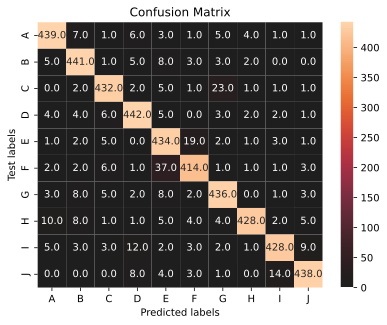

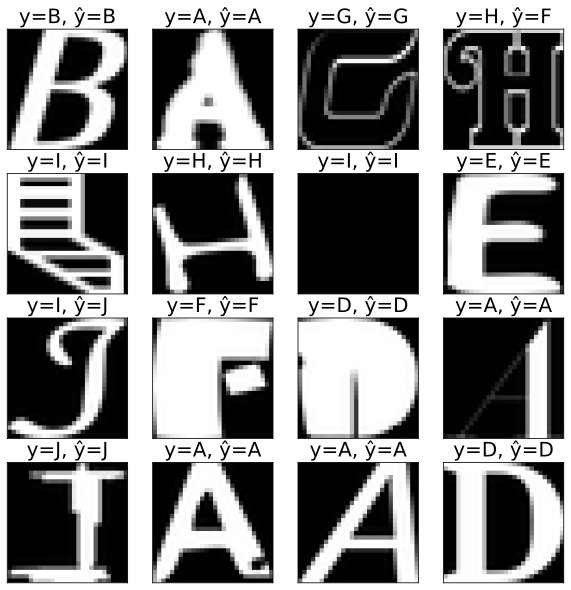

In [33]:
display_info(y_test, y_pred)

In [ ]:
import pandas as pd


data = {'Models': ['Tom', 'nick', 'krish', 'jack'],
        'Accuracy': [20, 21, 19, 18]}
 
# Create DataFrame
df = pd.DataFrame(data)
 
# Print the output.
print(df)